프로젝트2: MNIST NN모델의 prediction 실험
컴퓨터정보통신공학부 2019253018 이준형

TensorFlow에서 이미지 데이터셋 불러오기 & MINIST 데이터셋 불러오기


In [31]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

데이터셋 조정, 배열형태로 변경, 픽셀값 조정

In [30]:
train_images = train_images.reshape(60000, 28, 28, 1) / 255.0
test_images = test_images.reshape(10000, 28, 28, 1) / 255.0

저번과제 모델 사용, 최적화

In [14]:
model_Task1 = models.Sequential()
model_Task1.add(layers.Flatten(input_shape=(28, 28, 1)))
model_Task1.add(layers.Dense(256, activation='relu'))
model_Task1.add(layers.Dense(128, activation='relu'))
model_Task1.add(layers.Dense(10, activation='softmax'))

optimizer = tf.keras.optimizers.Adam()
loss_function = tf.keras.losses.SparseCategoricalCrossentropy()
metrics = ['accuracy']

model_Task1.compile(optimizer=optimizer,
               loss=loss_function,
               metrics=metrics)

모델 Train

In [28]:
epochs = 37  # epoch 는 과제1에서 알아 낸 값을 그대로 이용한다.
batch_size = 32

In [32]:
train_results = model_Task1.fit(train_images, train_labels, epochs=epochs, batch_size=batch_size, validation_split=0.2)


Epoch 1/4
1500/1500 [==============================] - 5s 3ms/step - loss: 7.6610 - accuracy: 0.9877 - val_loss: 4.2348 - val_accuracy: 0.9904
Epoch 2/4
1500/1500 [==============================] - 5s 4ms/step - loss: 2.0873 - accuracy: 0.9943 - val_loss: 3.0132 - val_accuracy: 0.9927
Epoch 3/4
1500/1500 [==============================] - 4s 3ms/step - loss: 1.7257 - accuracy: 0.9948 - val_loss: 10.3482 - val_accuracy: 0.9820
Epoch 4/4
1500/1500 [==============================] - 6s 4ms/step - loss: 2.0921 - accuracy: 0.9935 - val_loss: 3.8067 - val_accuracy: 0.9911


테스트 데이터셋 평가

In [36]:
results = model_Task1.evaluate(test_images, test_labels)
test_loss, test_accuarcy = results[0], results[1]

313/313 [==============================] - 0s 1ms/step - loss: 17.7096 - accuracy: 0.9773


In [43]:
print("Model_Task1 Test Accuracy:", test_accuarcy)

x_test = np.random.rand(1600, 784)  # 1600개의 무작위 이미지 데이터, 각 이미지는 784개의 픽셀로 구성됨
x_test = x_test[:1600]
y_test = np.random.randint(0, 10, 1600)  # 1600개의 무작위 레이블 데이터 (0부터 9까지의 정수)
y_test = y_test[:1600]

test_images=test_images[:1600]
test_labels=test_labels[:1600]

pred2 = model_Task1.predict(test_images)

Model_Task1 Test Accuracy: 0.9772999882698059
50/50 [==============================] - 0s 1ms/step


예측 실패 샘플들 리스트에 추가

In [45]:
import numpy as np

wrong = []
for i in range(1600):
    predicted_label = np.argmax(pred2[i])
    if predicted_label != test_labels[i]:
        wrong.append(i)

wnum = len(wrong)

In [46]:
wrong = [i for i in range(1600) if np.argmax(pred2[i]) != test_labels[i]]
tg = [pred2[i][test_labels[i]] for i in wrong]
wr_tg = np.column_stack((wrong, tg))
res = wr_tg[wr_tg[:,1].argsort()]


pred shape & wnum 출력

In [48]:
    print(f"pred shape: {pred2.shape}")
    print(f"wnum: {len(wrong)}")

pred shape: (1600, 10)
wnum: 42


이미지 출력

예제번호: 247
정답레이블: 4
예측레이블: 2
정답레이블의 확률: 0.0


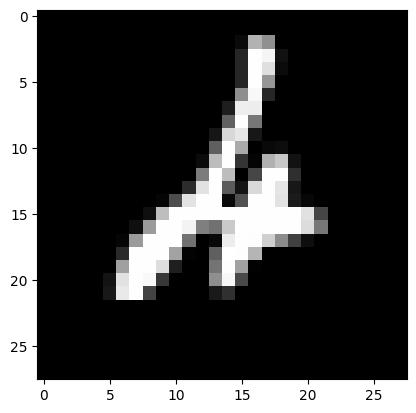

예제번호: 1156
정답레이블: 7
예측레이블: 8
정답레이블의 확률: 0.0


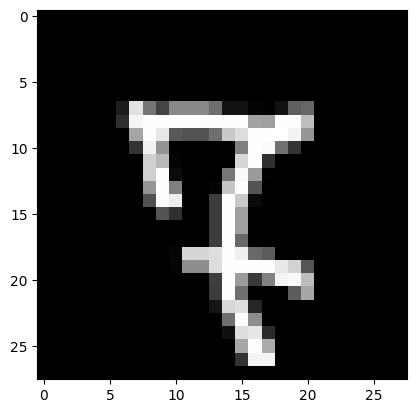

예제번호: 1182
정답레이블: 6
예측레이블: 8
정답레이블의 확률: 0.0


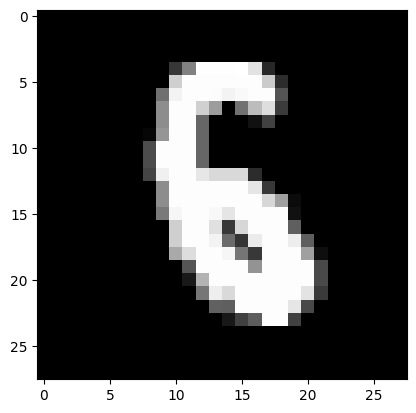

In [58]:
for i in range(3):
    example_num = int(res[i][0])
    true_label = test_labels[example_num]
    predicted_label = np.argmax(pred2[example_num])
    true_prob = res[i][1]

    print(f"예제번호: {example_num}")
    print(f"정답레이블: {true_label}")
    print(f"예측레이블: {predicted_label}")
    print(f"정답레이블의 확률: {true_prob}")

    plt.imshow(test_images[example_num].reshape(28, 28), cmap='gray')
    plt.show()